This experiment shows the performance between random sampling and our proposed method

In [1]:
import os
import sys

sys.path.append('/home/xiaomeng/jupyter_base/AutoFS/code')
print(sys.path)

import pandas as pd

['/home/xiaomeng/jupyter_base', '/home/xiaomeng/miniconda3/envs/shaow/lib/python39.zip', '/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9', '/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/lib-dynload', '', '/home/xiaomeng/.local/lib/python3.9/site-packages', '/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/site-packages', '/home/xiaomeng/jupyter_base/AutoFS/code']


In [24]:
from utils.tools import test_task_new
from feature_env import FeatureEvaluator
import matplotlib.pyplot as plt

MEASUREMENT = {
    'cls': ['Precision', 'Recall', 'F1score', 'ROC/AUC'],
    'reg': ['MAE', 'MSE', 'RAE', 'RMSE'],
    'det': ['MAP', 'F1score', 'RAS', 'Recall']
}
base_path = '/home/xiaomeng/jupyter_base/AutoFS/data'
def report_performance(name):
	fe = FeatureEvaluator(name)
	file_ours = f'{base_path}/history/{fe.task_name}.hdf'
	file_random = f'{base_path}/history/{fe.task_name}/best-ours-random-test.hdf'
	assert os.path.exists(file_ours) and os.path.exists(file_random)
	ds_ours = pd.read_hdf(file_ours, 'our_test')
	ds_ran = pd.read_hdf(file_random)
	ours_p = test_task_new(ds_ours, task=fe.task_type)
	ran_p = test_task_new(ds_ran, task=fe.task_type)
	return ours_p, ran_p, fe.task_type

def show_and_out(name, id):
	ours_p, ran_p, type = report_performance(name)
	print(name)
	cols = MEASUREMENT[type]
	p = pd.DataFrame(zip(ours_p, ran_p, [id] * 4))
	p.columns = ['Ours', 'Random', 'id']
	p.index = cols
	print(p)
	# p.to_csv(f'/home/xiaomeng/jupyter_base/AutoFS/code/ours/exps/RQ1:RandomSampling/out/{name}.csv')

In [25]:
for id, i in enumerate(['spectf'
	          #              , 'svmguide3', 'german_credit', 'spam_base',
              # 'ionosphere', 'megawatt1', 'uci_credit_card',
              #                            'openml_618', 'openml_589', 'openml_616', 'openml_607', 'openml_620',
              # 'openml_637',
              # 'openml_586', 'higgs'
                        ]):
    show_and_out(i, id)

INFO:  initialize the train and test dataset


ValueError: key must be provided when HDF5 file contains multiple datasets.

In [26]:
import seaborn as sns
TASK_DICT = {'airfoil': 'reg', 'amazon_employee': 'cls', 'ap_omentum_ovary': 'cls',
             'bike_share': 'reg', 'german_credit': 'cls', 'higgs': 'cls',
             'housing_boston': 'reg', 'ionosphere': 'cls', 'lymphography': 'cls',
             'messidor_features': 'cls', 'openml_620': 'reg', 'pima_indian': 'cls',
             'spam_base': 'cls', 'spectf': 'cls', 'svmguide3': 'cls',
             'uci_credit_card': 'cls', 'wine_red': 'cls', 'wine_white': 'cls',
             'openml_586': 'reg', 'openml_589': 'reg', 'openml_607': 'reg',
             'openml_616': 'reg', 'openml_618': 'reg', 'openml_637': 'reg',
             'smtp': 'det', 'thyroid': 'det', 'yeast': 'det', 'wbc': 'det', 'mammography': 'det', 'arrhythmia': 'cls',
             'nomao': 'cls', 'megawatt1': 'cls'
             }
label_dict = {0:'Ours', 1:'Random'}
# metric_dict = {2:'F1score', 0:'Precision', 1:'Recall', 3:'ROC/AUC'}

def trans_df(df:pd.DataFrame, task_type):
	metric_indice, label_index = df.shape
	transed_list = []
	for i in range(metric_indice):
		for j in range(label_index):
			value = df.values[i, j]
			transed_list.append([value, label_dict[j], MEASUREMENT[task_type][i]])
	return pd.DataFrame(transed_list)

def show_img(name):
    ds = pd.read_csv(f'/home/xiaomeng/jupyter_base/AutoFS/code/ours/exps/RQ1:RandomSampling/out/{name}.csv')
    df = ds.iloc[:, 1:-1]
    df.index = ds.iloc[:, 0]
    df = df * 100
    df = trans_df(df, TASK_DICT[name])
    plt.figure(dpi=120)
    ax = sns.barplot(data=df, x =2, y =0, hue=1, order = MEASUREMENT[TASK_DICT[name]])
    ax.set_yscale('log')
    ax.set(xlabel='Metrics', ylabel='Performance', title=name)
    plt.show()

spectf


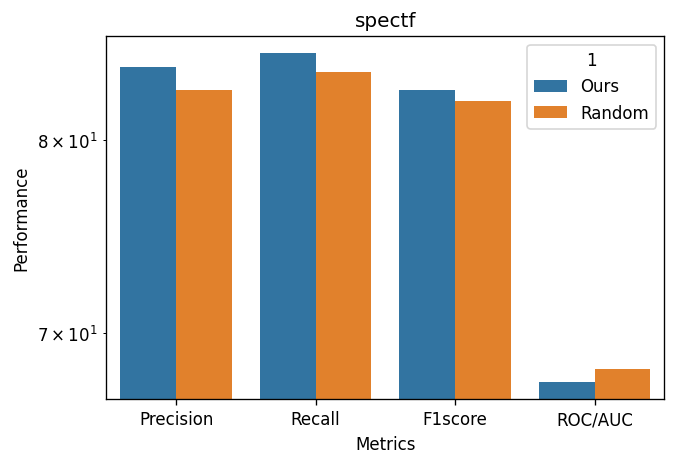

svmguide3


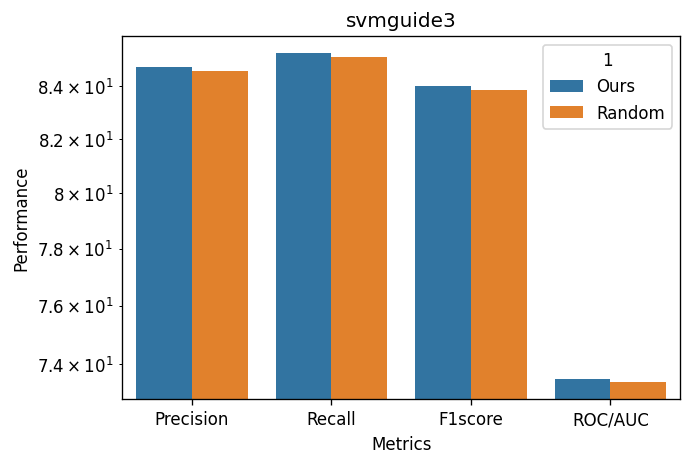

german_credit


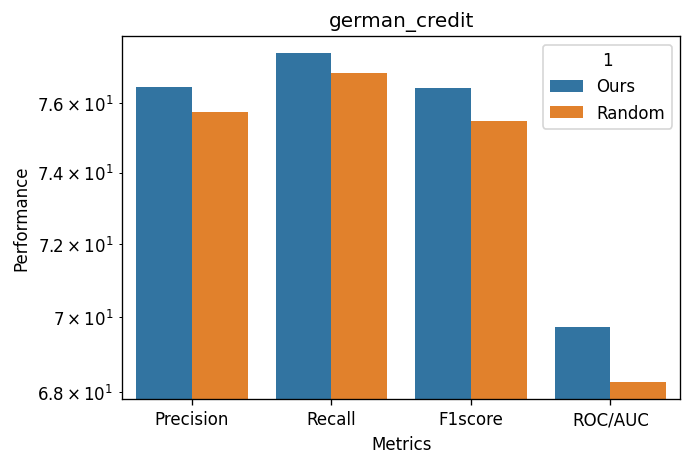

spam_base


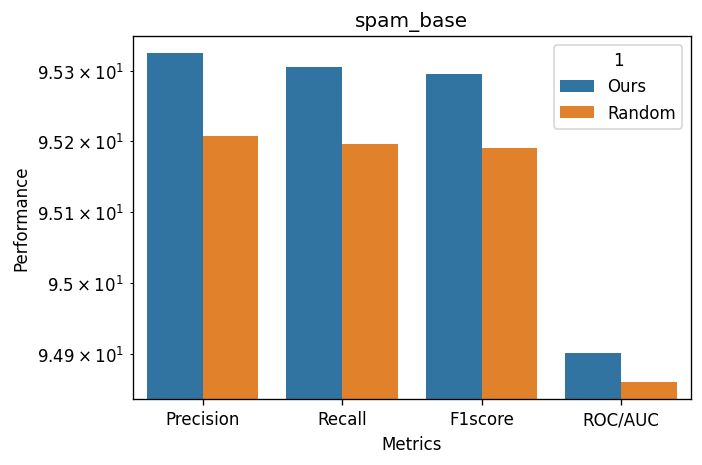

ionosphere


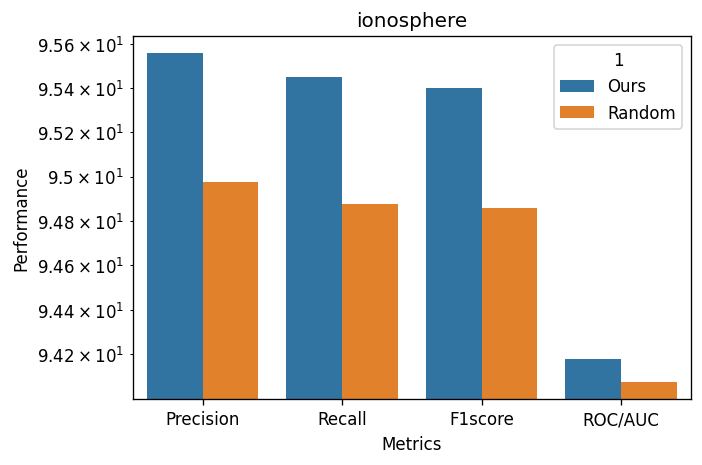

megawatt1


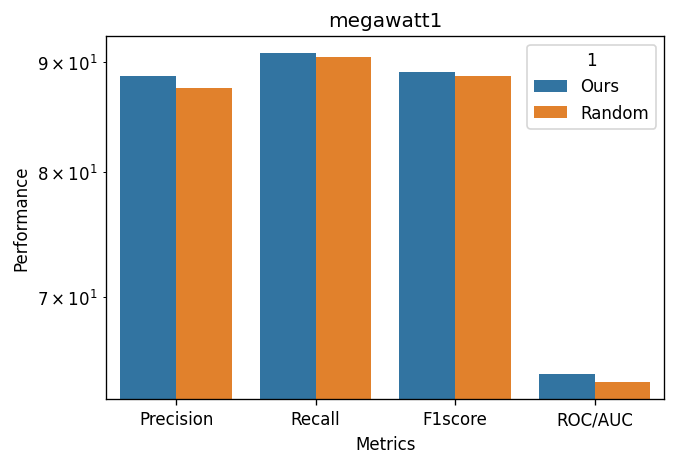

uci_credit_card


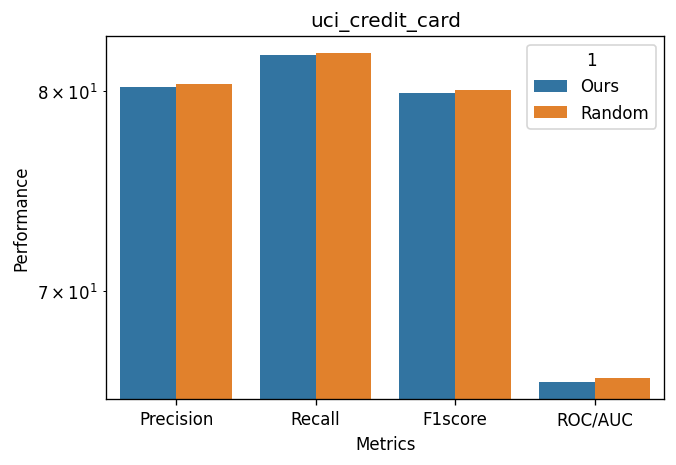

openml_618


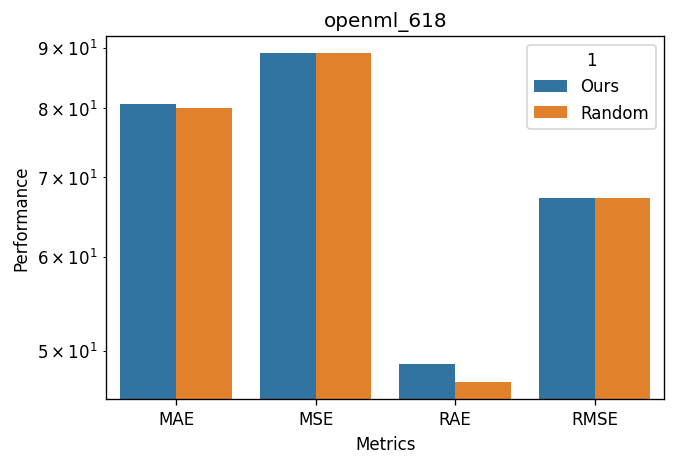

openml_589


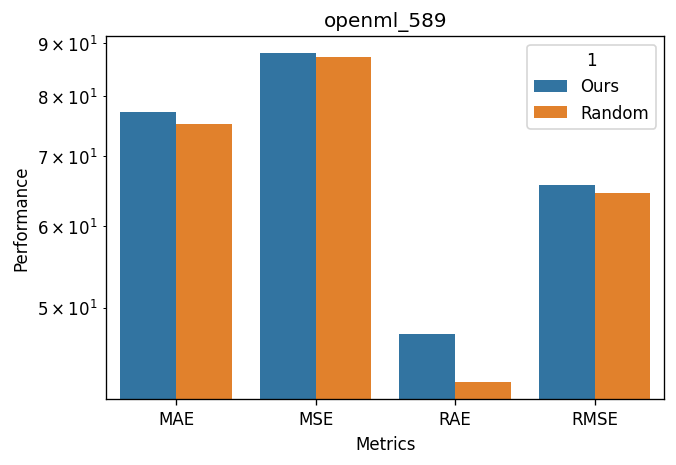

openml_616


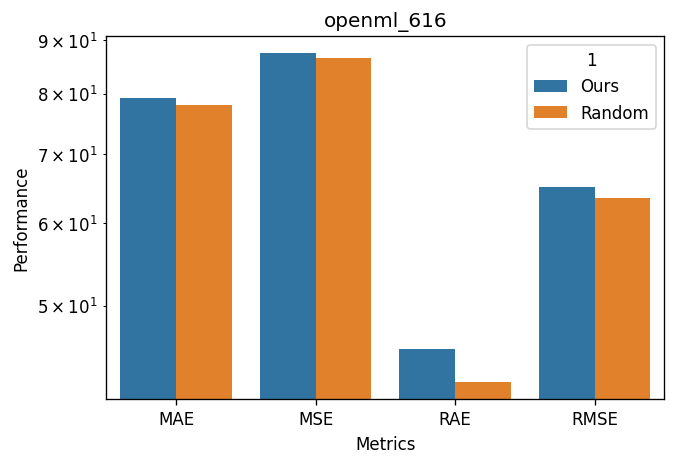

openml_607


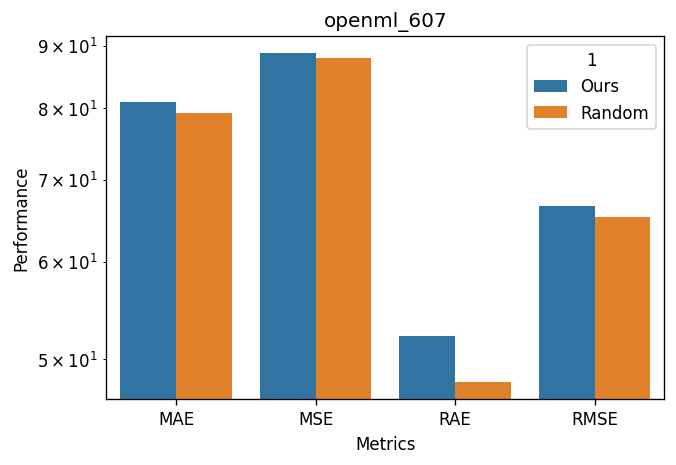

openml_620


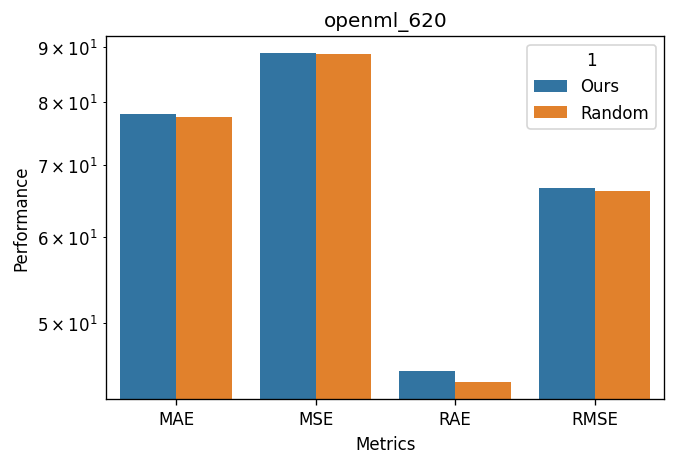

openml_637


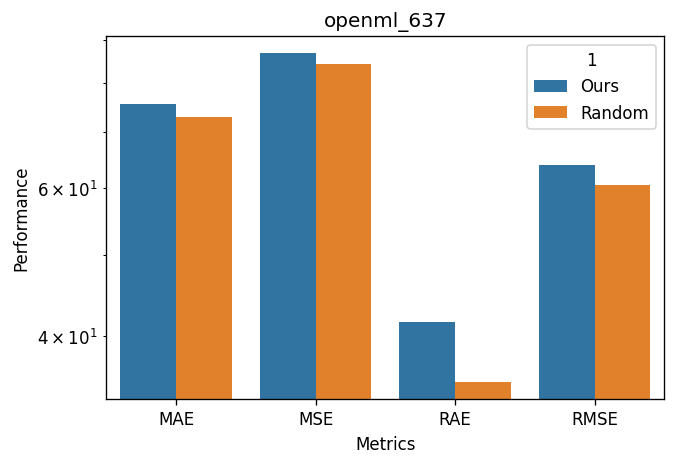

openml_586


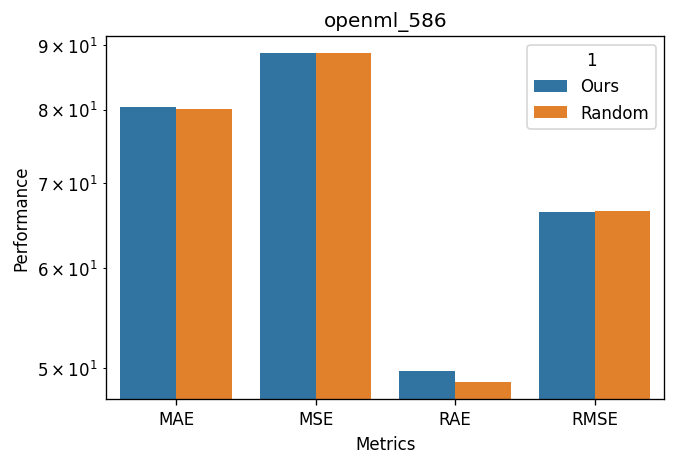

higgs


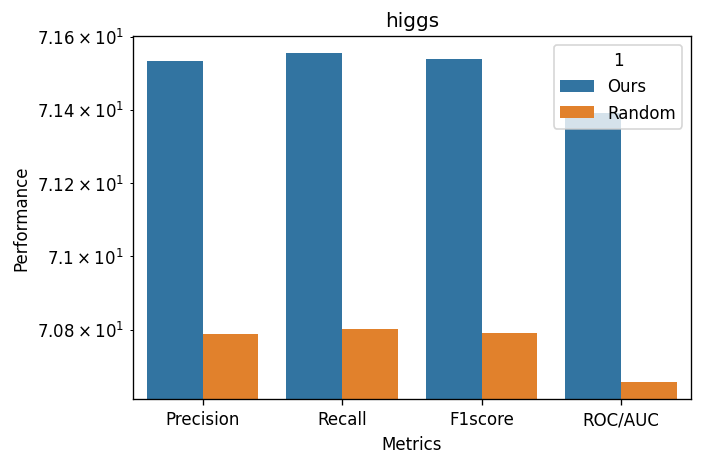

In [30]:
for id, i in enumerate(['spectf', 'svmguide3', 'german_credit', 'spam_base',
              'ionosphere', 'megawatt1', 'uci_credit_card',
                                         'openml_618', 'openml_589', 'openml_616', 'openml_607', 'openml_620',
              'openml_637',
              'openml_586', 'higgs']):
	print(i)
	show_img(i)

In [4]:
import pandas
task_name = 'spectf'
method = 'gfe'
fe = FeatureEvaluator(task_name)
gfe_test = pandas.read_hdf(f'{base_path}/history/{task_name}.hdf', key=f'{method}_test')
metrics = MEASUREMENT[fe.task_type]
a_1,b_1,c_1,d_1 = test_task_new(gfe_test, fe.task_type)
r1 = [a_1,b_1,c_1,d_1]
# print(report_head)
for indice, name in enumerate(metrics):
    print(f'{name}\t{r1[indice]}')
print('done')

INFO:  initialize the train and test dataset


KeyError: 'No object named gfe_test in the file'

In [5]:
import pandas
task_name = 'german_credit'
method = 'mcdm'
fe = FeatureEvaluator(task_name)
gfe_test = pandas.read_hdf(f'{base_path}/history/{task_name}.hdf', key=f'{method}_test')
metrics = MEASUREMENT[fe.task_type]
a_1,b_1,c_1,d_1 = test_task_new(gfe_test, fe.task_type)
r1 = [a_1,b_1,c_1,d_1]
# print(report_head)
for indice, name in enumerate(metrics):
    print(f'{name}\t{r1[indice]}')
print('done')

INFO:  initialize the train and test dataset
Precision	0.7161413706119589
Recall	0.7300000000000001
F1score	0.708517855444733
ROC/AUC	0.6222122704881325
done
